![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Fix Contrast with Histogram Equalization**

####**In this lesson we'll learn:**
1. How to implement Histogram Equalization

In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg

--2023-06-05 11:50:00--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.82
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  12.9MB/s    in 2.2s    

2023-06-05 11:50:03 (12.9 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2023-06-05 11:50:03--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/soaps.jpeg [fol

In [2]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
  h, w = image.shape[:2]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(title)
  plt.show()


### **Using Histogram Equalization** 

![](https://docs.opencv.org/master/histogram_equalization.png)

This 'adjusts' the dynamic range of an image, making it spread more evenly accorss the intensity distribution, and thus improving contrast.

#### **First, let's take a look at the Histogram of our Input Image**

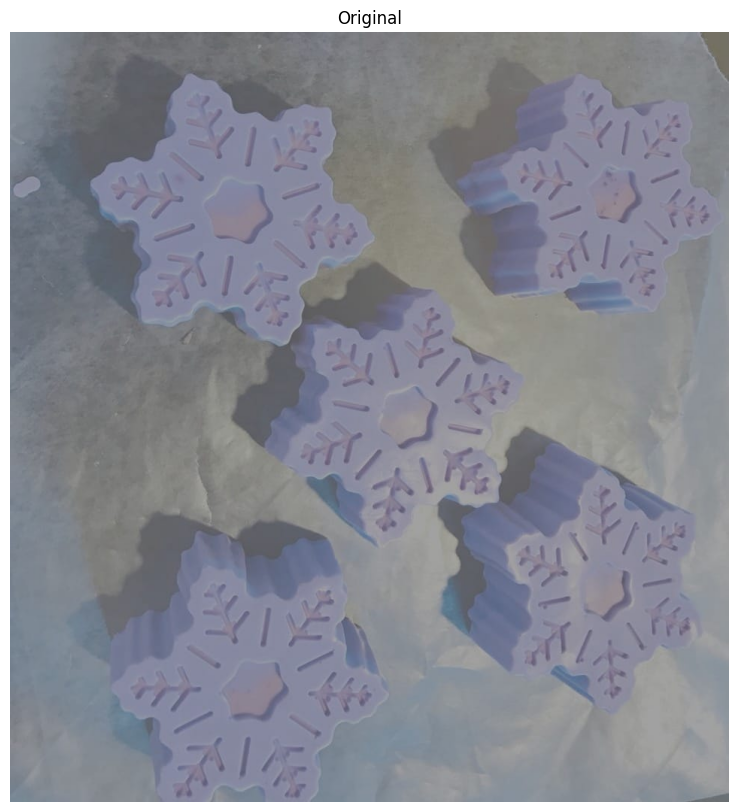

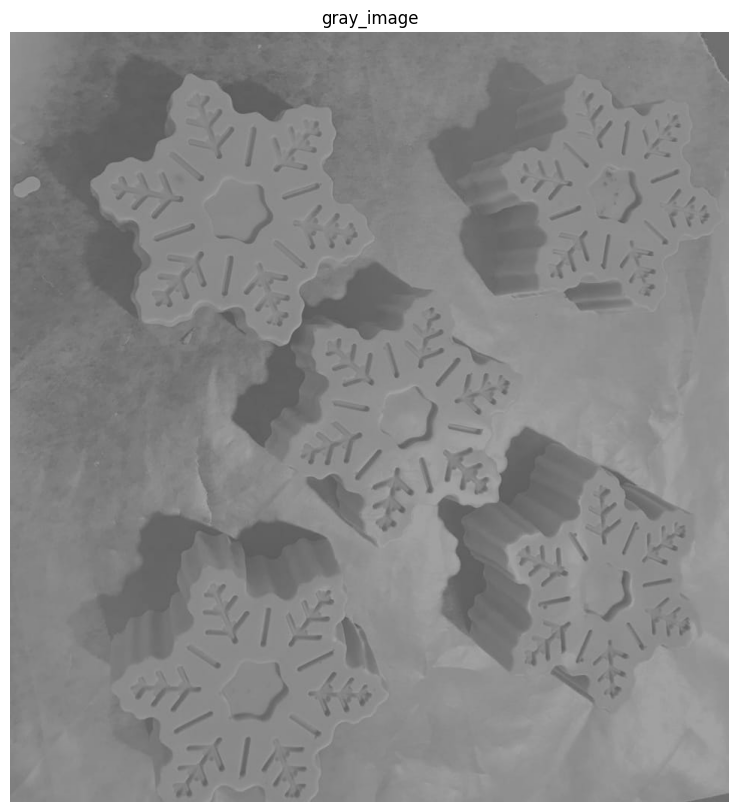

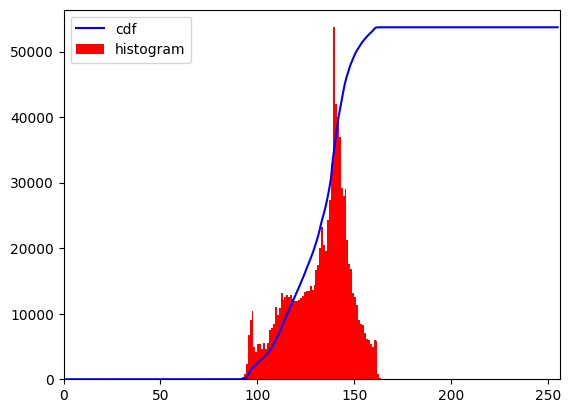

In [3]:
img = cv2.imread('soaps.jpeg')
imshow("Original", img)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow("gray_image", gray_image)

# Create our histogram distribution
hist, bins = np.histogram(gray_image.flatten(), 256, [0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(), 256, [0,256], color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


#### **Now, let's apply Histogram Equalization**

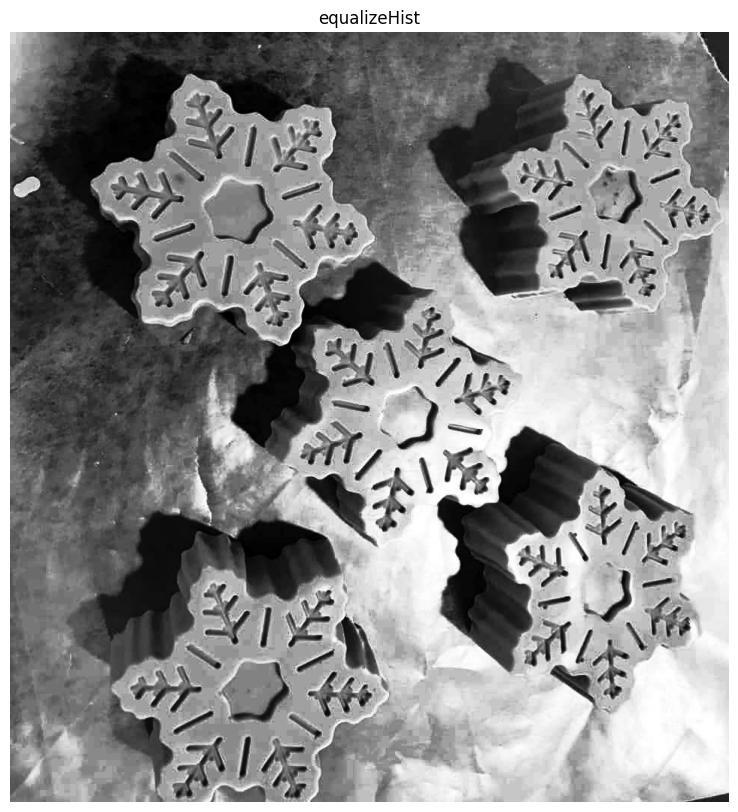

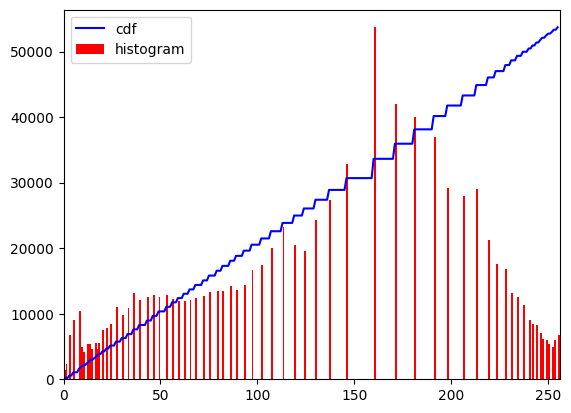

In [4]:
img = cv2.imread('soaps.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equalize our Histogram
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

# Create our histogram distribution
hist, bins = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### **Excerise:**
1. Equlize all RGB (BGR) channels of this image and then merge them together to obtain an equlized color image.

In [5]:
img = cv2.imread('soaps.jpeg')
 
imshow("Original", img)
 
# Equalize our Histogram
# Default color format is BGR 
 
red_channel = img[:, :, 2]
red = cv2.equalizeHist(red_channel)
 
green_channel = img[:, :, 1]
green = cv2.equalizeHist(green_channel)
 
blue_channel = img[:, :, 0]
blue = cv2.equalizeHist(blue_channel)
 
# create empty image with same shape as that of src image
red_img = np.zeros(img.shape)
red_img[:, :, 2] = red
red_img = np.array(red_img, dtype=np.uint8)
imshow("Red", red_img)
 
green_img = np.zeros(img.shape)
green_img[:, :, 1] = green
green_img = np.array(green_img, dtype=np.uint8)
imshow("Green", green_img)
 
blue_img = np.zeros(img.shape)
blue_img[:,:,0] = blue
blue_img = np.array(blue_img, dtype=np.uint8)
imshow("Blue", blue_img)
 
merged = cv2.merge([blue, green, red])
imshow("Merged", merged)

Output hidden; open in https://colab.research.google.com to view.